# Numpy Basics

Multidimensional arrays are the main object in Numpy. The dimensions of these arrays are called the axes and the number of axes is called the rank. Here is an example of a rank two array where the first dim (axis) has length 2 and the second dim (axis) has length 3.

In [1]:
[[ 1., 0., 0.],
 [ 0., 1., 2.]]

[[1.0, 0.0, 0.0], [0.0, 1.0, 2.0]]

Numpy's array class is called ndarray. Here are some of the important attributes of this class.

ndarray.ndim
the number of axes (dimensions) of the array. In the Python world, the number of dimensions is referred to as rank.

ndarray.shape
the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the rank, or number of dimensions, ndim.

ndarray.size
the total number of elements of the array. This is equal to the product of the elements of shape.

ndarray.dtype
an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

ndarray.itemsize
the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize.

ndarray.data
the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities.

## Example

In [1]:
import numpy as np

In [3]:
a = np.arange(15).reshape(3,5)

In [4]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [6]:
a.shape

(3, 5)

In [7]:
a.ndim

2

In [8]:
a.dtype.name

'int64'

In [9]:
a.itemsize

8

In [10]:
a.size

15

In [11]:
type(a)

numpy.ndarray

In [12]:
b = np.array([6,7,8])

In [13]:
b

array([6, 7, 8])

In [14]:
type(b)

numpy.ndarray

## Array Creation

Arrays can be created in several ways including from regular python list and tuples

In [15]:
a = np.array([2,3,4])

In [16]:
a

array([2, 3, 4])

In [17]:
a.dtype

dtype('int64')

In [18]:
b = np.array([(1.5,2,3),(4,5,6)])

In [19]:
b

array([[ 1.5,  2. ,  3. ],
       [ 4. ,  5. ,  6. ]])

The array time can be explicitly definded at creation

In [20]:
c = np.array([[1,2],[3,4]], dtype=complex)

In [21]:
c

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

It is expensive to grow arrays during a computation so numpy offers several ways to create arrays with placeholders

In [22]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [24]:
np.ones((2,3,4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [25]:
np.empty((2,3))

array([[  6.90390631e-310,   6.90390631e-310,   0.00000000e+000],
       [  1.27319747e-313,   1.27319747e-313,   1.27319747e-313]])

To create sequences NumPy provides functions analagous to range that returns arrays instead of lists

In [26]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [27]:
np.arange(0, 2, 0.3)

array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8])

When floats are used with arange it is not generally possible to determine the number of elements obtained so it is usually better to use linspace which specifies the number of elements we want back instead of specifing the step size.

In [2]:
from numpy import pi

In [30]:
np.linspace(0, 2, 9) # nine numbers from 0 to 2

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [31]:
x = np.linspace(0, 2*pi, 100) # useful to eval functions at lots of points

In [33]:
f = np.sin(x)

In [3]:
from matplotlib import pyplot as plt

In [38]:
%matplotlib inline

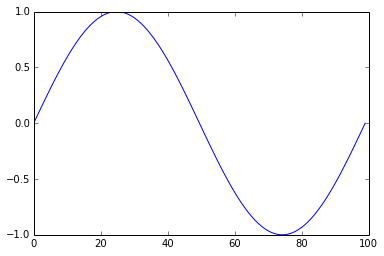

In [39]:
plt.plot(f)

## Printing Arrays

When you print a NumPy array it is displayed as follows:
* the last axis is printed left to right
* the second-to-last is printed top to bottom
* the rests are also printed top to bottom, with each slice sperated from the next by an empty line


In [40]:
a = np.arange(6)

In [41]:
print a

[0 1 2 3 4 5]


In [42]:
b = np.arange(12).reshape(4,3)

In [43]:
print b

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [44]:
c = np.arange(24).reshape(2,3,4)

In [45]:
print c

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


If an array is too large to be prinetd NumPy skips the central part and prints only the corners

In [46]:
print (np.arange(10000))

[   0    1    2 ..., 9997 9998 9999]


In [47]:
print (np.arange(10000).reshape(100,100))

[[   0    1    2 ...,   97   98   99]
 [ 100  101  102 ...,  197  198  199]
 [ 200  201  202 ...,  297  298  299]
 ..., 
 [9700 9701 9702 ..., 9797 9798 9799]
 [9800 9801 9802 ..., 9897 9898 9899]
 [9900 9901 9902 ..., 9997 9998 9999]]


## Basic Operations

Arithmetic operators on arrays apply *elementwise*. A new array is created and filled with the result.

In [48]:
a = np.array([20, 30, 40, 50])

In [49]:
b = np.arange(4)

In [51]:
print a, b

[20 30 40 50] [0 1 2 3]


In [52]:
c = a-b

In [53]:
print c

[20 29 38 47]


In [54]:
print b**2

[0 1 4 9]


In [55]:
print 10 * np.sin(a)

[ 9.12945251 -9.88031624  7.4511316  -2.62374854]


In [56]:
a<35

array([ True,  True, False, False], dtype=bool)

Unlike other matrix languages the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the dot function

In [57]:
A = np.array([[1,1],[0,1]])

In [59]:
B = np.array([[2,0],[3,4]])

In [61]:
print A

[[1 1]
 [0 1]]


In [62]:
print B

[[2 0]
 [3 4]]


In [63]:
print A*B # elementwise product

[[2 0]
 [0 4]]


In [64]:
A.dot(B) # example of matrix product

array([[5, 4],
       [3, 4]])

In [65]:
np.dot(A,B) #another way to write the dot product, I like this one better.

array([[5, 4],
       [3, 4]])

Some operations such as += and \*= act in place modifying an array rather than creating a new one

In [66]:
a = np.ones((2,3), dtype=int)

In [68]:
b = np.random.random((2,3))

In [69]:
print a

[[1 1 1]
 [1 1 1]]


In [70]:
print b

[[ 0.11432686  0.06688273  0.20894685]
 [ 0.85447481  0.93845909  0.54811654]]


In [71]:
a *= 3

In [72]:
print a

[[3 3 3]
 [3 3 3]]


In [74]:
b += a

In [75]:
print b # note that a was recast as int64 type here to add these together

[[ 3.11432686  3.06688273  3.20894685]
 [ 3.85447481  3.93845909  3.54811654]]


In [76]:
a += b # This will cast b as type int since a comes first? but if you do c = a+b the more precise b (int64) is used

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  if __name__ == '__main__':


In [77]:
a

array([[6, 6, 6],
       [6, 6, 6]])

When adding arrays of different types NumPy uses *upcasting* i.e. the higher precision array type is used as the result type.

In [3]:
a = np.ones(3,dtype=np.int32)

In [6]:
b = np.linspace(0, pi, 3)

In [7]:
b.dtype.name

'float64'

In [8]:
c = a + b

In [9]:
print c

[ 1.          2.57079633  4.14159265]


In [10]:
c.dtype.name

'float64'

Many unary operations such as computing the sum are implemented as methods of the ndarray class

In [4]:
a = np.random.random((2,3))

In [5]:
print a

[[ 0.4768758   0.16648281  0.98963855]
 [ 0.71770539  0.54480466  0.63038208]]


In [6]:
a.sum()

3.5258892838802822

In [7]:
a.min()

0.16648280525416137

In [8]:
a.max()

0.98963855050122407

By defualt the unary operations apply to the array as though it were simply a list of numbers. However you can specify the axis over which to apply the operation.

In [9]:
b = np.arange(12).reshape(3,4)

In [10]:
print b

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [11]:
b.sum(axis=0) # sum of each column

array([12, 15, 18, 21])

In [12]:
b.min(axis=1) # min of each row

array([0, 4, 8])

In [13]:
b.cumsum(axis=1) #cum sum along each row

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

## Universal Functions

NumPy provides familiar mathematical functions such as sin, cos, exp.. These are called 'universal functions'. You can use help(np.ufunc) to get help with a specific function. These functions operate elementwise producing an array as output.

In [14]:
B = np.arange(3)

In [15]:
print B

[0 1 2]


In [16]:
print np.exp(B)

[ 1.          2.71828183  7.3890561 ]


In [17]:
print np.sqrt(B)

[ 0.          1.          1.41421356]


In [18]:
C = np.array([2., -1., 4.])

In [19]:
print np.add(B,C)

[ 2.  0.  6.]


See also
all, any, apply_along_axis, argmax, argmin, argsort, average, bincount, ceil, clip, conj, corrcoef, cov, cross, cumprod, cumsum, diff, dot, floor, inner, inv, lexsort, max, maximum, mean, median, min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, transpose, var, vdot, vectorize, where

## Indexing, Slicing and Iterating

**One dimensional arrays** can be indexed, sliced and iterated over much like Python sequences

In [20]:
a = np.arange(10)**3

In [21]:
print a

[  0   1   8  27  64 125 216 343 512 729]


In [22]:
a[2] # get element 2

8

In [23]:
a[2:5] # get elements 2 up to but not including 5

array([ 8, 27, 64])

In [29]:
a[:6:2]=-1000 # from start up to 6 position, exclusive, set every 2nd element to -1000

In [30]:
print a

[-1000     1 -1000    27 -1000   125   216   343   512   729]


In [31]:
a[::-1] # reverse a

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1, -1000])

In [40]:
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,   729])

In [45]:
for i in a:
    print i**(1/3.0)

nan
1.0
nan
3.0
nan
5.0
6.0
7.0
8.0
9.0


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


** Multidimensional arrays ** can have one index per axis. These indices are given in a tuple separated by commas.

In [46]:
def f(x,y):
    return 10*x+y

In [47]:
b = np.fromfunction(f,(5,4),dtype=int) # element values are given by the function f, x is rows, y is columns

In [48]:
print b

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]]


In [49]:
print b[2,3]

23


In [50]:
b[0:5,1] # each row in the second col of b

array([ 1, 11, 21, 31, 41])

In [51]:
print b[:,1]

[ 1 11 21 31 41]


In [52]:
b[1:3,:] # each column in the second and third row of b

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

In [55]:
b[-1] # when indices provided < number of axes, the missing indices are considered slices. Here we get the last row

array([40, 41, 42, 43])

NumPy also allows you to write the above as b[i,...]. The dots represent as many colons as needed to produce a complete indexing tuple. Here this would be equivalent to b[-1,:]

In [58]:
c = np.array([[[0,1,2],
               [10,12,13]],
               [[100,101,102],
               [110,112,113]]])

In [59]:
print c

[[[  0   1   2]
  [ 10  12  13]]

 [[100 101 102]
  [110 112 113]]]


In [60]:
c.shape

(2, 2, 3)

In [61]:
c[1,...] # get the 2nd slice same as c[1]

array([[100, 101, 102],
       [110, 112, 113]])

In [62]:
c[...,2] # all slices, all rows, 3rd column

array([[  2,  13],
       [102, 113]])

** Iterating ** over arrays is done with respect to the first axis

In [63]:
print b

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]]


In [67]:
for row in b:
    print row

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


If you want to perform an elemntwise operation, you can use the flat attribute, an iterator over the elements.

In [68]:
for element in b.flat:
    print element

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


## Shape Manipulation

### Changing the shape of an array

An array has a shape given by the number of elements along each axis

In [3]:
a = np.floor(10*np.random.random((3,4)))

In [4]:
print a

[[ 8.  2.  7.  4.]
 [ 3.  1.  5.  3.]
 [ 0.  6.  1.  8.]]


In [5]:
a.shape

(3, 4)

The shape of an array can be changed with various commands:

In [6]:
a.ravel() #flatten the array

array([ 8.,  2.,  7.,  4.,  3.,  1.,  5.,  3.,  0.,  6.,  1.,  8.])

In [8]:
a.shape=(6,2)

In [9]:
print a

[[ 8.  2.]
 [ 7.  4.]
 [ 3.  1.]
 [ 5.  3.]
 [ 0.  6.]
 [ 1.  8.]]


In [10]:
print a.T #transpose

[[ 8.  7.  3.  5.  0.  1.]
 [ 2.  4.  1.  3.  6.  8.]]


In [11]:
print a


[[ 8.  2.]
 [ 7.  4.]
 [ 3.  1.]
 [ 5.  3.]
 [ 0.  6.]
 [ 1.  8.]]


In [12]:
a.resize((2,6))

In [13]:
a

array([[ 8.,  2.,  7.,  4.,  3.,  1.],
       [ 5.,  3.,  0.,  6.,  1.,  8.]])

If a dimension is given -1 to reshape, the dimensions will be automatically calculated.

In [14]:
a.reshape(3,-1)

array([[ 8.,  2.,  7.,  4.],
       [ 3.,  1.,  5.,  3.],
       [ 0.,  6.,  1.,  8.]])

### Stacking together different arrays

Several arrays can be stacked together along different axes:

In [15]:
a = np.floor(10*np.random.random((2,2)))

In [16]:
print a

[[ 5.  8.]
 [ 1.  7.]]


In [17]:
b = np.floor(10*np.random.random((2,2)))

In [18]:
print b

[[ 6.  3.]
 [ 7.  7.]]


In [19]:
np.vstack((a,b))

array([[ 5.,  8.],
       [ 1.,  7.],
       [ 6.,  3.],
       [ 7.,  7.]])

In [20]:
np.hstack((a,b))

array([[ 5.,  8.,  6.,  3.],
       [ 1.,  7.,  7.,  7.]])

In [25]:
np.dstack((a,b)) #stack along 3rd dim

array([[[ 5.,  6.],
        [ 8.,  3.]],

       [[ 1.,  7.],
        [ 7.,  7.]]])

In [27]:
from numpy import newaxis

In [29]:
print a

[[ 5.  8.]
 [ 1.  7.]]


In [30]:
print b

[[ 6.  3.]
 [ 7.  7.]]


In [31]:
np.column_stack((a,b))

array([[ 5.,  8.,  6.,  3.],
       [ 1.,  7.,  7.,  7.]])

In [33]:
a = np.array([4.,2.])

In [34]:
b = np.array([2.,8.])

In [35]:
a[:,newaxis]

array([[ 4.],
       [ 2.]])

In [36]:
np.column_stack((a[:,newaxis],b[:,newaxis]))

array([[ 4.,  2.],
       [ 2.,  8.]])

For arrays with more than 2 dimensions, hstack staks along their second axes, vstack stacks along their first axes and concatenate allows for optional arguments giving the axis along which the concatenation should happen.

In [37]:
a

array([ 4.,  2.])

In [38]:
b

array([ 2.,  8.])

In [43]:
np.concatenate((a,b), axis=0)

array([ 4.,  2.,  2.,  8.])

In [44]:
a

array([ 4.,  2.])

### Splitting arrays into smaller arrays

Using hsplit, you can split an array along its horizontal axis

In [3]:
a = np.floor(10*np.random.random((2,12)))

In [4]:
print a

[[ 5.  3.  8.  1.  8.  7.  8.  3.  1.  0.  5.  8.]
 [ 1.  1.  0.  6.  8.  0.  7.  3.  4.  8.  5.  8.]]


In [6]:
np.hsplit(a,3) #split a into 3

[array([[ 5.,  3.,  8.,  1.],
        [ 1.,  1.,  0.,  6.]]), array([[ 8.,  7.,  8.,  3.],
        [ 8.,  0.,  7.,  3.]]), array([[ 1.,  0.,  5.,  8.],
        [ 4.,  8.,  5.,  8.]])]

In [7]:
print a

[[ 5.  3.  8.  1.  8.  7.  8.  3.  1.  0.  5.  8.]
 [ 1.  1.  0.  6.  8.  0.  7.  3.  4.  8.  5.  8.]]


In [8]:
np.hsplit(a,(3,4)) # split a after the third and fourth col

[array([[ 5.,  3.,  8.],
        [ 1.,  1.,  0.]]), array([[ 1.],
        [ 6.]]), array([[ 8.,  7.,  8.,  3.,  1.,  0.,  5.,  8.],
        [ 8.,  0.,  7.,  3.,  4.,  8.,  5.,  8.]])]

## Copies and Views

When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not. There are three cases:

### No Copy at All